In [ ]:
!pip install -q transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.0 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
import torch

In [ ]:
!pip install sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 41.2 MB/s eta 0:00:00


In [ ]:
model_name = "microsoft/biogpt"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/595 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

In [ ]:
generator = pipeline("text-generation", model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

Device set to use cpu


In [ ]:
drug_target_dict = {
    "Auranofin": ["TXNRD1", "NF-κB", "ROS"],
    "Sorafenib": ["CRAF", "BRAF", "VEGFR-2/-3", "PDGFR-β", "c-Kit", "RET"],
    "Lenvatinib": ["VEGFR1-3", "FGFR1-4", "PDGFRα", "RET", "KIT"],
    "Cabozantinib": ["MET", "VEGFR2", "RET", "AXL", "KIT"],
    "Vandetanib": ["VEGFR", "EGFR", "RET"],
    "Everolimus": ["mTORC1"],
    "Nivolumab": ["PD-1 "],
    "Doxorubicin": ["DNA", "topoisomerase II", "ROS "],
    "Epirubicin" : ["DNA", "topoisomerase II", "ROS"],
    "Pazopanib" : ["VEGFR", "PDGFR", "c-Kit"]
}

In [ ]:
def generate_hypothesis(drug, target):
    prompt = f"{drug} may treat anaplastic thyroid cancer by targeting {target} because"
    output = generator(
        prompt,
        max_length=50,
        num_return_sequences=1,
        do_sample=True,
        temperature=0.8,
        truncation=True  # ✅ Add this line
    )
    return output[0]['generated_text'].replace(prompt, '').strip()

In [ ]:
results = {}

for drug, targets in drug_target_dict.items():
    results[drug] = {}
    for target in targets:
        hypothesis = generate_hypothesis(drug, target)
        results[drug][target] = hypothesis


Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both

In [ ]:
for drug, targets in results.items():
    print(f"\n🔬 {drug}")
    for target, hypothesis in targets.items():
        print(f"  ➤ {target}: {hypothesis}")


🔬 Auranofin
  ➤ TXNRD1: this protein is overexpressed in this cancer.
  ➤ NF-κB: NF-κB has been suggested to be a regulator of cell proliferation and malignant transformation.
  ➤ ROS: it does not induce ROS in normal thyrocytes, which is consistent with its mechanism of action as an inhibitor of thioredoxin reductase.

🔬 Sorafenib
  ➤ CRAF: sorafenib is effective against most anaplastic thyroid cancer cell lines.
  ➤ BRAF: of its BRAF V600E mutation.
  ➤ VEGFR-2/-3: of its antitumor and antiangiogenic mechanisms.
  ➤ PDGFR-β: it inhibits the kinase activity and phosphorylation of PDGFR-β, the protein kinase B (Akt) and ribosomal S6 kinase.
  ➤ c-Kit: of its high expression in thyroid cancer tissues, and may have clinical potential as a therapeutic agent for this disease.
  ➤ RET: of its multikinase activity.

🔬 Lenvatinib
  ➤ VEGFR1-3: of its unique antiangiogenic and antiproliferative properties.
  ➤ FGFR1-4: they share a common receptor tyrosine kinase in the FGFR family.
  ➤ PDGFR

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 59.4 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez
Entrez.email = "nida.amir0083@gmail.com"  # Replace with your email for NCBI Entrez

def search_pubmed(query, max_results=5):
    handle = Entrez.esearch(db="pubmed", term=query, retmax=max_results)
    record = Entrez.read(handle)
    handle.close()
    return record["IdList"]

def fetch_abstracts(id_list):
    ids = ",".join(id_list)
    handle = Entrez.efetch(db="pubmed", id=ids, rettype="abstract", retmode="text")
    results = handle.read()
    handle.close()
    return results

In [ ]:
# Validate hypotheses with PubMed search
for drug, hypotheses in results.items(): # Changed all_hypotheses to results
    print(f"\nValidating hypotheses for {drug}:")
    for target, hypothesis in hypotheses.items(): # Added iteration through target and hypotheses
        print(f"\nHypothesis for {target}: {hypothesis}") # Changed to hypothesis for {target}
        search_results = search_pubmed(hypothesis)
        if search_results:
            abstracts = fetch_abstracts(search_results)
            print("Matching PubMed abstracts:")
            print(abstracts[:1000])  # Print first 1000 characters
        else:
            print("No matches found on PubMed.")


Validating hypotheses for Auranofin:

Hypothesis for TXNRD1: this protein is overexpressed in this cancer.
Matching PubMed abstracts:
1. Mol Biol Rep. 2025 Jun 27;52(1):644. doi: 10.1007/s11033-025-10761-3.

Acid phosphatase type 6 promotes endometrial cancer progression via activating 
PI3K/AKT pathway.

Lin Q(1)(2), Liang X(3)(4), Ma L(1), Ma X(1), Li B(2), Yang Y(5)(6), Yang 
K(7)(8)(9).

Author information:
(1)The First Clinical Medical College of Lanzhou University, Lanzhou, China.
(2)Department of Critical Care Medicine, The First Hospital of Lanzhou 
University, Lanzhou, China.
(3)Department of Obstetrics and Gynecology, The First Hospital of Lanzhou 
University, Donggang West Road, Lanzhou, China.
(4)Gansu Provincial Clinical Research Center for Gynecological Oncology, The 
First Hospital of Lanzhou University, Lanzhou, China.
(5)Department of Obstetrics and Gynecology, The First Hospital of Lanzhou 
University, Donggang West Road, Lanzhou, China. yongxiuyang123@163.com.
(6)Ga

In [ ]:
# prompt: create the dataframe of above outcome in df = pd.DataFrame(data)

import pandas as pd

# Prepare the data for the DataFrame
data = []
for drug, targets_hypotheses in results.items():
    for target, hypothesis in targets_hypotheses.items():
        data.append({"Drug": drug, "Target": target, "Hypothesis": hypothesis})

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Drug,Target,Hypothesis
0,Auranofin,TXNRD1,this protein is overexpressed in this cancer.
1,Auranofin,NF-κB,NF-κB has been suggested to be a regulator of ...
2,Auranofin,ROS,"it does not induce ROS in normal thyrocytes, w..."
3,Sorafenib,CRAF,sorafenib is effective against most anaplastic...
4,Sorafenib,BRAF,of its BRAF V600E mutation.
5,Sorafenib,VEGFR-2/-3,of its antitumor and antiangiogenic mechanisms.
6,Sorafenib,PDGFR-β,it inhibits the kinase activity and phosphoryl...
7,Sorafenib,c-Kit,of its high expression in thyroid cancer tissu...
8,Sorafenib,RET,of its multikinase activity.
9,Lenvatinib,VEGFR1-3,of its unique antiangiogenic and antiprolifera...


No charts were generated by quickchart


In [ ]:
# prompt: Generate above dataframe with these headings Drug     Target/Pathway  Hypothesis      PubMed Evidence

# Search PubMed for evidence for each hypothesis
import time # Import the time module

pubmed_evidence = []
for index, row in df.iterrows():
    query = f"{row['Drug']} AND {row['Target']} AND {row['Hypothesis']}"
    search_results = search_pubmed(query)
    if search_results:
        abstracts = fetch_abstracts(search_results)
        # Add some logic to summarize or select the most relevant abstract text
        pubmed_evidence.append(abstracts[:500] + "...") # Example: Take the first 500 characters
    else:
        pubmed_evidence.append("No direct evidence found on PubMed.")
    time.sleep(0.5) # Add a short delay between requests

# Add the PubMed Evidence column to the DataFrame
df['PubMed Evidence'] = pubmed_evidence

# Rename 'Target' column to 'Target/Pathway' for consistency
df = df.rename(columns={'Target': 'Target/Pathway'})

# Display the updated DataFrame
df

,Drug,Target/Pathway,Hypothesis,PubMed Evidence
0,Auranofin,TXNRD1,this protein is overexpressed in this cancer.,1. Neoplasia. 2024 Jul;53:101004. doi: 10.1016...
1,Auranofin,NF-κB,NF-κB has been suggested to be a regulator of ...,No direct evidence found on PubMed.
2,Auranofin,ROS,"it does not induce ROS in normal thyrocytes, w...",No direct evidence found on PubMed.
3,Sorafenib,CRAF,sorafenib is effective against most anaplastic...,No direct evidence found on PubMed.
4,Sorafenib,BRAF,of its BRAF V600E mutation.,1. Arch Pharm Res. 2025 Feb;48(2):150-165. doi...
5,Sorafenib,VEGFR-2/-3,of its antitumor and antiangiogenic mechanisms.,No direct evidence found on PubMed.
6,Sorafenib,PDGFR-β,it inhibits the kinase activity and phosphoryl...,No direct evidence found on PubMed.
7,Sorafenib,c-Kit,of its high expression in thyroid cancer tissu...,No direct evidence found on PubMed.
8,Sorafenib,RET,of its multikinase activity.,1. Cancers (Basel). 2025 May 28;17(11):1800. d...
9,Lenvatinib,VEGFR1-3,of its unique antiangiogenic and antiprolifera...,No direct evidence found on PubMed.


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

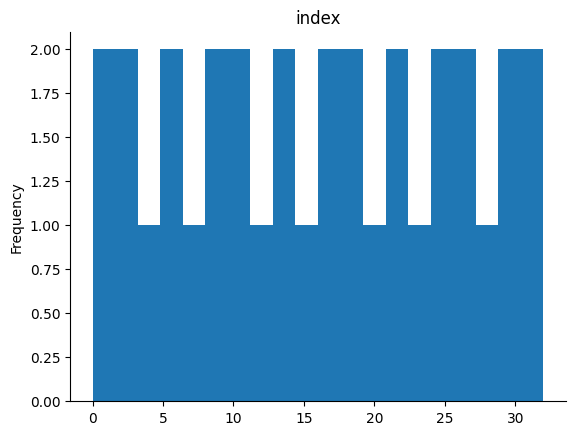

In [ ]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.to_csv("Validated_Hypotheses_ATC.csv", index=False)


In [ ]:
from google.colab import files
files.download("Validated_Hypotheses_ATC.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from Bio import Entrez

# Required: Set your email address (NCBI requires this)
Entrez.email = "nida.amir0083@gmail.com"  # Replace with your real email

def search_pubmed(query, retmax=5):
    """Searches PubMed and returns a list of matching article titles."""
    try:
        handle = Entrez.esearch(db="pubmed", term=query, retmax=retmax)
        record = Entrez.read(handle)
        handle.close()

        id_list = record["IdList"]
        if not id_list:
            return ["No results found."]

        # Fetch article summaries
        handle = Entrez.esummary(db="pubmed", id=",".join(id_list))
        records = Entrez.read(handle)
        handle.close()

        titles = [rec["Title"] for rec in records]
        return titles
    except Exception as e:
        return [f"Error: {e}"]

# Example: Validate a hypothesis involving Sorafenib and RET in ATC
query = "Sorafenib AND RET AND anaplastic thyroid cancer"
results = search_pubmed(query)

# Display the results
for idx, title in enumerate(results, 1):
    print(f"{idx}. {title}")


1. An Era of Advances in Systemic Therapies for Advanced Thyroid Cancer.
2. Thyroid Cancer: A Review.
3. Survival Outcomes of Advanced Thyroid Cancer Enriched in Brain Metastases Following Treatment With Small Molecule Inhibitors.
4. Kinase inhibitors in thyroid cancers.
5. Molecular basis and targeted therapy in thyroid cancer: Progress and opportunities.


In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
from google.colab import data_table
import vega_datasets

data_table.enable_dataframe_formatter()

# Display the existing DataFrame 'df'
df

,Drug,Target/Pathway,Hypothesis,PubMed Evidence
0,Auranofin,TXNRD1,this protein is overexpressed in this cancer.,1. Neoplasia. 2024 Jul;53:101004. doi: 10.1016...
1,Auranofin,NF-κB,NF-κB has been suggested to be a regulator of ...,No direct evidence found on PubMed.
2,Auranofin,ROS,"it does not induce ROS in normal thyrocytes, w...",No direct evidence found on PubMed.
3,Sorafenib,CRAF,sorafenib is effective against most anaplastic...,No direct evidence found on PubMed.
4,Sorafenib,BRAF,of its BRAF V600E mutation.,1. Arch Pharm Res. 2025 Feb;48(2):150-165. doi...
5,Sorafenib,VEGFR-2/-3,of its antitumor and antiangiogenic mechanisms.,No direct evidence found on PubMed.
6,Sorafenib,PDGFR-β,it inhibits the kinase activity and phosphoryl...,No direct evidence found on PubMed.
7,Sorafenib,c-Kit,of its high expression in thyroid cancer tissu...,No direct evidence found on PubMed.
8,Sorafenib,RET,of its multikinase activity.,1. Cancers (Basel). 2025 May 28;17(11):1800. d...
9,Lenvatinib,VEGFR1-3,of its unique antiangiogenic and antiprolifera...,No direct evidence found on PubMed.
